## PART 1

In [345]:
import networkx as nx
from collections import deque

In [346]:
with open('input2.txt') as f:
    M = list(map(lambda x: list(x.strip()), f.readlines()))

for row in M: 
    for el in row: 
        assert el in ['#', '.', '>', 'v']
        print(el, end=' ')
    print()

assert len(M) == len(M[0])  # matrice quadrata
n = len(M)

# . # # # # # # # # # # # # # # # # # # # # # 
# . . . . . . . # # # # # # # # # . . . # # # 
# # # # # # # . # # # # # # # # # . # . # # # 
# # # . . . . . # . > . > . # # # . # . # # # 
# # # v # # # # # . # v # . # # # . # . # # # 
# # # . > . . . # . # . # . . . . . # . . . # 
# # # v # # # . # . # . # # # # # # # # # . # 
# # # . . . # . # . # . . . . . . . # . . . # 
# # # # # . # . # . # # # # # # # . # . # # # 
# . . . . . # . # . # . . . . . . . # . . . # 
# . # # # # # . # . # . # # # # # # # # # v # 
# . # . . . # . . . # . . . # # # . . . > . # 
# . # . # v # # # # # # # v # # # . # # # v # 
# . . . # . > . # . . . > . > . # . # # # . # 
# # # # # v # . # . # # # v # . # . # # # . # 
# . . . . . # . . . # . . . # . # . # . . . # 
# . # # # # # # # # # . # # # . # . # . # # # 
# . . . # # # . . . # . . . # . . . # . # # # 
# # # . # # # . # . # # # v # # # # # v # # # 
# . . . # . . . # . # . > . > . # . > . # # # 
# . # # # . # # # . # . # # # . # . # v # # # 
# . . . . . #

nella matrice non ci sono i simboli < e ^

se sono in (i,j) e M[i][j] == '.' allora vale sempre j-1 >= 0

se sono in (i,j) e M[i][j] == '.' allora vale sempre i+1 < n, tranne che per il punto di arrivo

se sono in (i,j) e M[i][j] == '.' allora vale sempre i-1 >= 0, tranne che per il punto di partenza

In [347]:
DAG = nx.DiGraph()

Q = deque()
Q.append(tuple([tuple([0,1]),tuple([1,1])]))

while Q:

    source, dest = Q.popleft()
    DAG.add_edge(source, dest)
    
    i,j = dest

    if M[i-1][j] not in ['#', 'v']:
        t = tuple([i-1,j])
        if t != source: Q.append(tuple([dest,t]))

    if i+1 < n and M[i+1][j] != '#':
        t = tuple([i+1,j])
        if t != source: Q.append(tuple([dest,t]))

    if M[i][j-1] not in ['#', '>']:
        t = tuple([i,j-1])
        if t != source: Q.append(tuple([dest,t]))

    if j+1 < n and M[i][j+1] != '#':
        t = tuple([i,j+1])
        if t != source: Q.append(tuple([dest,t]))

# nx.draw(G)

In [348]:
assert nx.is_directed_acyclic_graph(DAG)

max([len(p)-1 for p in nx.all_simple_paths(DAG, source=tuple([0,1]), target=tuple([n-1,n-2]))])

94

## PART 2

<div>
<img src="map.png" width="350"/>
</div>

In [349]:
G = nx.Graph()

Q = deque()
Q.append(tuple([tuple([0,1]),tuple([1,1])]))

while Q:

    source, dest = Q.popleft()
    if G.has_edge(source,dest): 
        continue
    G.add_edge(source, dest, weight=1)
    
    i,j = dest

    if M[i-1][j] != '#':
        t = tuple([i-1,j])
        if t != source: Q.append(tuple([dest,t]))

    if i+1 < n and M[i+1][j] != '#':
        t = tuple([i+1,j])
        if t != source: Q.append(tuple([dest,t]))

    if M[i][j-1] != '#':
        t = tuple([i,j-1])
        if t != source: Q.append(tuple([dest,t]))

    if j+1 < n and M[i][j+1] != '#':
        t = tuple([i,j+1])
        if t != source: Q.append(tuple([dest,t]))


#nx.draw(G, pos=nx.spring_layout(G))

In [350]:
junctions = [n for n in G.nodes if G.degree[n] > 2] + [tuple([0,1]), tuple([n-1,n-2])]
junctions

[(5, 3),
 (13, 5),
 (3, 11),
 (13, 13),
 (19, 13),
 (11, 21),
 (19, 19),
 (0, 1),
 (22, 21)]

In [351]:
PATHS = set()

for n in junctions:
    for x in G.neighbors(n):

        S = set()
        S.add(n)
        S.add(x)

        cur = x

        # print(list(G.neighbors(cur)))
        while len(list(G.neighbors(cur))) <= 2 and cur not in junctions: # and cur != n:
            #print(cur)
            for k in G.neighbors(cur):
                if k not in S:
                    S.add(k)
                    cur = k
                    break
                #elif k == n: print('*',k,n, len(S))
        

        if tuple([cur, n, len(S)-1]) not in PATHS: 
            PATHS.add(tuple([n, cur, len(S)-1]))
        #assert n != cur
        #print(n, cur, len(S)-1)
        #for p in nx.all_simple_paths(G, source=n, target=cur):
        #    print(n,cur, len(S)-1, len(p))

        assert cur in junctions
    #break

PATHS



{((3, 11), (11, 21), 30),
 ((3, 11), (13, 13), 24),
 ((5, 3), (0, 1), 15),
 ((5, 3), (3, 11), 22),
 ((5, 3), (13, 5), 22),
 ((11, 21), (19, 19), 10),
 ((13, 5), (13, 13), 12),
 ((13, 5), (19, 13), 38),
 ((13, 13), (11, 21), 18),
 ((13, 13), (19, 13), 10),
 ((19, 13), (19, 19), 10),
 ((19, 19), (22, 21), 5)}

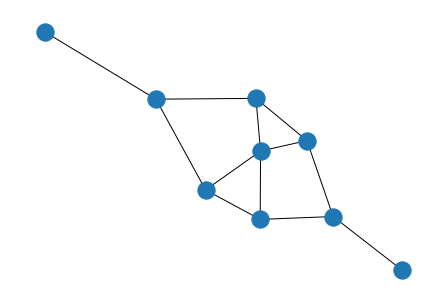

In [352]:
new_G = nx.Graph()
for edge in PATHS:
    new_G.add_edge(edge[0], edge[1], weight=edge[2])

nx.draw(new_G, pos=nx.spring_layout(new_G))

In [358]:
res = -1
for p in nx.all_simple_paths(new_G, source=tuple([0,1]), target=tuple([len(M)-1,len(M)-2])):
    w = nx.path_weight(new_G, p, 'weight')
    if w > res:
        res = w
res

In [354]:
#max([len(p)-1 for p in nx.all_simple_paths(G, source=tuple([0,1]), target=tuple([n-1,n-2]))])

IDEA : path compression